In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate Data

In [2]:
X_train = np.linspace(-1, 1, 20)

In [3]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  ,
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475,
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [4]:
X_test = np.linspace(-1, 1, 20)

In [5]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

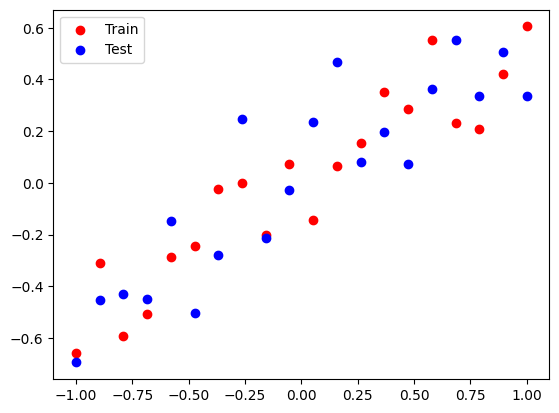

In [6]:
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.legend()
plt.show()

# Regression Model

In [7]:
model_1 = Sequential()

model_1.add(Dense(128, input_dim=1, activation="relu"))
model_1.add(Dense(128, activation="relu"))
model_1.add(Dense(1, activation="linear"))

adam = Adam(learning_rate=0.01)
model_1.compile(loss='mse', optimizer=adam, metrics=['mse'])

history = model_1.fit(X_train, y_train, epochs=500,
                    validation_data = (X_test, y_test))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.1206 - mse: 0.1206 - val_loss: 0.0340 - val_mse: 0.0340
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0208 - mse: 0.0208 - val_loss: 0.0513 - val_mse: 0.0513
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0380 - mse: 0.0380 - val_loss: 0.0367 - val_mse: 0.0367
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0241 - mse: 0.0241 - val_loss: 0.0319 - val_mse: 0.0319
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0381 - val_mse: 0.0381
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0255 - mse: 0.0255 - val_loss: 0.0371 - val_mse: 0.0371
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0247 - mse: 0.0247 - val_loss: 0.0314 - val_mse: 0.0314
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0289 - val_mse: 0.0289
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0169 - mse: 0.

In [8]:
# evaluate the model
_, train_mse = model_1.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_1.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.004295927472412586, Test: 0.046973567456007004


In [9]:
y_pred_1 = model_1.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


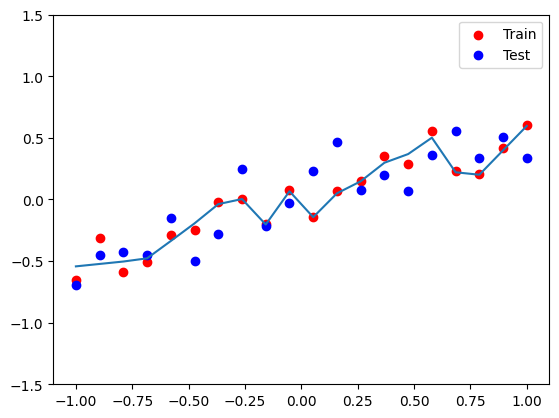

In [10]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_1)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

# Dropout Model

In [25]:
model_2 = Sequential()
model_2.add(Dense(128, input_dim=1, activation="relu"))
model_2.add(Dropout(0.2))
model_2.add(Dense(128, activation="relu"))
model_2.add(Dropout(0.2))
model_2.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_2.compile(loss='mse', optimizer=adam, metrics=['mse'])

drop_out_history = model_2.fit(X_train, y_train, epochs=500,
                               validation_data = (X_test, y_test))

Epoch 1/500


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.1204 - mse: 0.1204 - val_loss: 0.0343 - val_mse: 0.0343
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.0254 - mse: 0.0254 - val_loss: 0.0637 - val_mse: 0.0637
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0662 - mse: 0.0662 - val_loss: 0.0360 - val_mse: 0.0360
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0323 - mse: 0.0323 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0365 - val_mse: 0.0365
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0368 - mse: 0.0368 - val_loss: 0.0385 - val_mse: 0.0385
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0334 - mse: 0.0334 - val_loss: 0.0374 - val_mse: 0.0374
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0270 - mse: 0.0270 - val_loss: 0.0339 - val_mse: 0.0339
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0245 - mse: 0.0245 - val_l

In [26]:
# evaluate the model
_, train_mse = model_2.evaluate(X_train, y_train)
_, test_mse = model_2.evaluate(X_test, y_test)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0106 - mse: 0.0106
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0387 - mse: 0.0387
Train: 0.010643245652318, Test: 0.0386836938560009


In [27]:
y_pred_2 = model_2.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


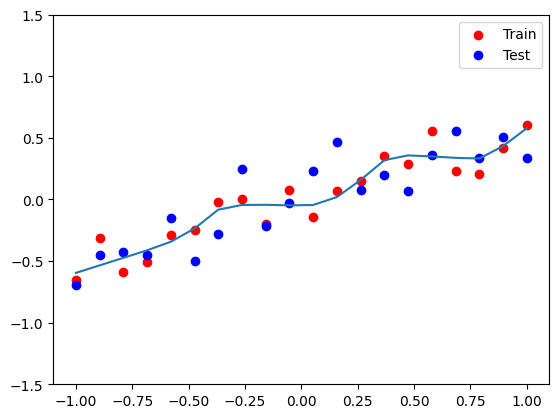

In [28]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_2)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

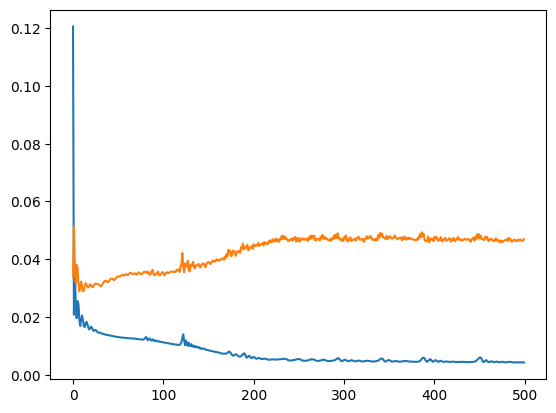

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

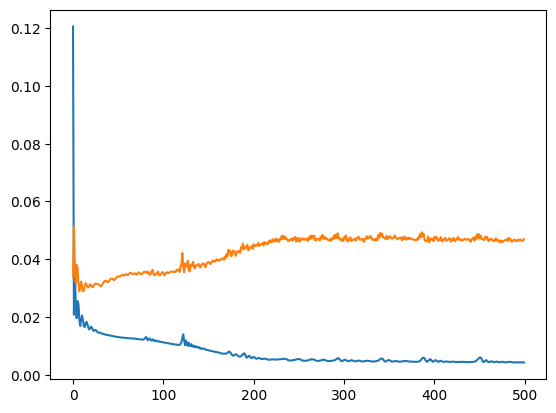

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])